# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **X** - Temperatura Média (°C)
- **Y** - Consumo de Cerveja (litros)


---

### Utilize a célula abaixo para carregar os pacotes e/ou fazer configurações para o projeto

In [ ]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 4)

### Importe o dataset

#### <font color=red>Utilize o parâmetro **sep = ';'** da função **read.csv** para importar corretamente o conjunto de dados. O dataset do projeto utiliza como separador de colunas o caractere ';'.

In [ ]:
dataset <- read.csv('dados_projeto.csv', sep = ';')

### Visualize o conteúdo do Data Frame

In [ ]:
nrow(dataset)

[1] 365

In [ ]:
head(dataset)

,Y,X
,<int>,<dbl>
1,25461,27.30
2,28972,27.02
3,30814,24.82
4,29799,23.98
5,28900,23.82
6,28218,23.78


### Obtenha e avalie as estatísticas descritivas dos dados

In [ ]:
summary(dataset)

       Y               X        
 Min.   :14343   Min.   :12.90  
 1st Qu.:22008   1st Qu.:19.02  
 Median :24867   Median :21.38  
 Mean   :25401   Mean   :21.23  
 3rd Qu.:28631   3rd Qu.:23.28  
 Max.   :37937   Max.   :28.86  

In [ ]:
apply(dataset, 2, sd)

Y           X 
4399.142703    3.180108

### Análise gráfica
### Construa um box plot para cada variável do dataset

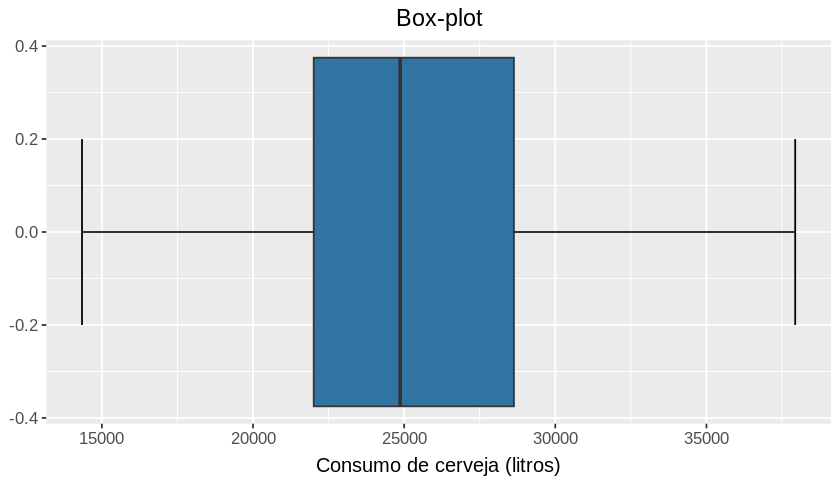

In [ ]:
ggplot(dataset, aes(y = Y)) +
  stat_boxplot(geom = 'errorbar', width = 0.4) +
  geom_boxplot(fill = c('#3274A1')) +
  coord_flip() +
  ylab("Consumo de cerveja (litros)") +
  ggtitle('Box-plot') +
  theme(
    plot.title=element_text(size = 14, hjust = 0.5),
    axis.title.x=element_text(size = 12, vjust = -0.2),
    axis.text.y=element_text(size = 10),
    axis.text.x=element_text(size = 10)
  )

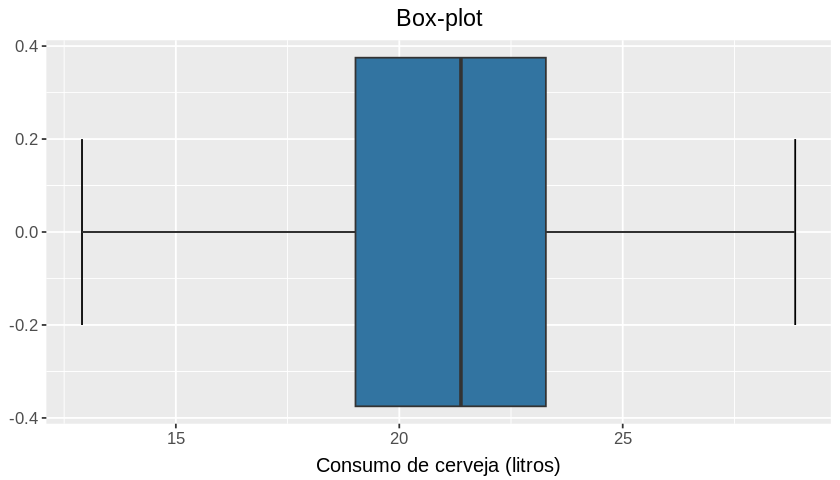

In [ ]:
ggplot(dataset, aes(y = X)) +
  stat_boxplot(geom = 'errorbar', width = 0.4) +
  geom_boxplot(fill = c('#3274A1')) +
  coord_flip() +
  ylab("Consumo de cerveja (litros)") +
  ggtitle('Box-plot') +
  theme(
    plot.title=element_text(size = 14, hjust = 0.5),
    axis.title.x=element_text(size = 12, vjust = -0.2),
    axis.text.y=element_text(size = 10),
    axis.text.x=element_text(size = 10)
  )

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

`geom_smooth()` using formula = 'y ~ x'


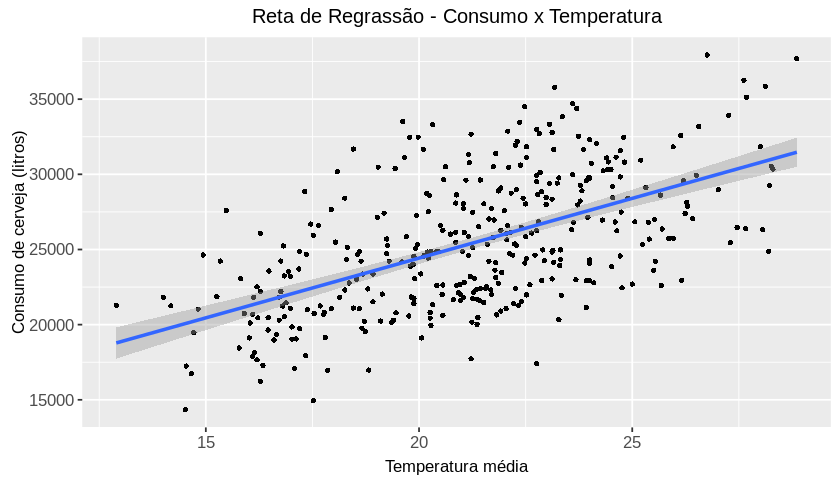

In [ ]:
ggplot(data = dataset, aes(x = X, y = Y)) +
  geom_point(size = 1.5, stroke = 0) +
  geom_smooth(method = lm) +
  xlab("Temperatura média") +
  ylab("Consumo de cerveja (litros)") +
  ggtitle('Reta de Regrassão - Consumo x Temperatura') +
  theme(
    plot.title=element_text(size = 12, hjust = 0.5),
    axis.title.y=element_text(size = 10, vjust = +0.2),
    axis.title.x=element_text(size = 10, vjust = -0.2),
    axis.text.y=element_text(size = 10),
    axis.text.x=element_text(size = 10)
  )

### <font color='red'>Utilizando a matriz de correlação</font>

In [ ]:
cor(dataset)

,Y,X
Y,1.0000000,0.5746147
X,0.5746147,1.0000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: 

É possível quantificar a intensidade dessa relação?

Resp.: 

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: 

### Estime o modelo de regressão linear simples

In [ ]:
resultado_regressao <- lm(formula = Y ~ X, data = dataset)

### Visualize o resultado da regressão

In [ ]:
summary(resultado_regressao)


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-9221.4 -2845.5  -315.3  2409.0  9392.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8528.91    1275.36   6.687  8.6e-11 ***
X             794.88      59.42  13.377  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3605 on 363 degrees of freedom
Multiple R-squared:  0.3302,	Adjusted R-squared:  0.3283 
F-statistic: 178.9 on 1 and 363 DF,  p-value: < 2.2e-16


### Obtenha o $Y$ previsto

In [ ]:
dataset['Y_previsto'] <- resultado_regressao$fitted.values
head(dataset)

,Y,X,Y_previsto
,<int>,<dbl>,<dbl>
1,25461,27.30,30229.20
2,28972,27.02,30006.63
3,30814,24.82,28257.89
4,29799,23.98,27590.19
5,28900,23.82,27463.01
6,28218,23.78,27431.21


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [ ]:
predict(resultado_regressao, data.frame(X = 42))

1 
41913.97

### Obtenha os resíduos da regressão

In [ ]:
dataset['Residuos'] <- resultado_regressao$residuals
head(dataset)

,Y,X,Y_previsto,Residuos
,<int>,<dbl>,<dbl>,<dbl>
1,25461,27.30,30229.20,-4768.201
2,28972,27.02,30006.63,-1034.633
3,30814,24.82,28257.89,2556.108
4,29799,23.98,27590.19,2208.809
5,28900,23.82,27463.01,1436.991
6,28218,23.78,27431.21,786.786


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

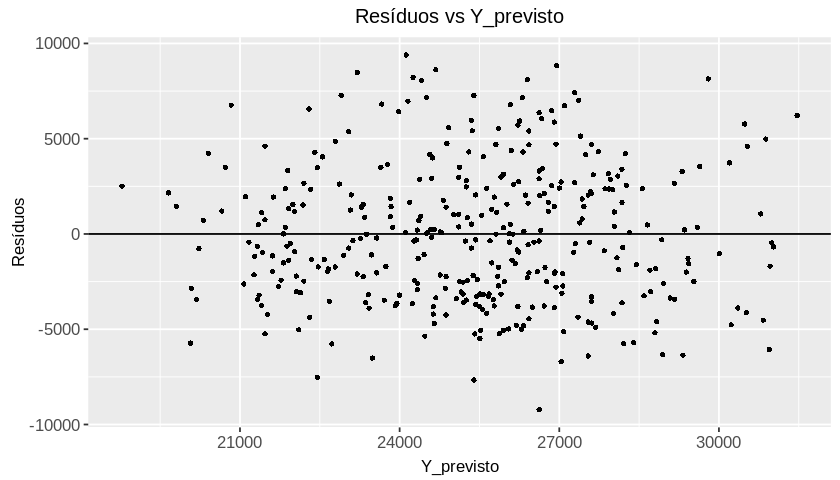

In [ ]:
ggplot(data = dataset, aes(x = Y_previsto, y = Residuos)) +
  geom_hline(yintercept = 0, color = 'black') +
  geom_point(size = 1.5, stroke = 0) +
  xlab("Y_previsto") +
  ylab("Resíduos") +
  ggtitle('Resíduos vs Y_previsto') +
  theme(
    plot.title=element_text(size = 12, hjust = 0.5),
    axis.title.y=element_text(size = 10, vjust = +0.2),
    axis.title.x=element_text(size = 10, vjust = -0.2),
    axis.text.y=element_text(size = 10),
    axis.text.x=element_text(size = 10)
  )

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$


In [ ]:
SQE <- sum(apply(dataset, 1, function(x) x['Residuos'] ** 2))
# Ou 
# SQE <- anova(resultado_regressao)$'Sum Sq'[2]
SQE

[1] 4718394688

In [ ]:
SQR <- sum(apply(dataset, 1, function(x) (x['Y_previsto'] - mean(dataset$Y_previsto)) ** 2))
# Ou
# SQR <- anova(resultado_regressao)$'Sum Sq'[1]
SQR

[1] 2325899487

In [ ]:
SQT = SQR + SQE
SQT

[1] 7044294175

In [ ]:
R2 = SQR / SQT
R2

[1] 0.330182

In [ ]:
summary(resultado_regressao)$r.squared

[1] 0.330182